## POST-CODE ANALYSIS

In [2]:
import os
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from tqdm import tqdm


1. TEXT DOMINANCE
2. SENTIMENT ANALYSIS
3. WORD FREQUENCIES
4. CO-OCCURENCE NETWORKS
5. VENN DIAGRAM
6. TOTAL INDIVIDUAL OCCURENCES

## FUNCTIONS

In [3]:
def group_func(csv_file):
    df = pd.read_csv(csv_file)

    #df = df[df["balloon_to_panel_ratio"] > 0].reset_index()

    #chunks = np.array_split(df["balloon_to_panel_ratio"], 1)
    #print("MEAN Balloon to Panel ratio:", round(np.mean(df['balloon_to_panel_ratio']), 2))
    #for i in range(len(chunks)):
    #    print("CHUNK ", i+1, "MEAN:", round(np.mean(chunks[i]), 2))

    grouped_df = df[["page", "balloon_to_panel_ratio"]].groupby("page").mean()

    return grouped_df

def count_balloons(csv_file):
    df = pd.read_csv(csv_file)
    balloon_sum = df["detected_balloon_numbers"].sum()
    #print(balloon_sum)
    return balloon_sum

def find_max_text_dominant(csv_file):
    df = pd.read_csv(csv_file)
    max_rate = df["balloon_to_panel_ratio"].max()
    return max_rate

In [4]:
folder_path = "./csv_final_versions2/"
files = os.listdir(folder_path)
if '.DS_Store' in files:
        files.remove('.DS_Store')
files.sort()
print(files)

['t_01.csv', 't_02.csv', 't_03.csv', 't_04.csv', 't_05.csv', 't_06.csv', 't_07.csv', 't_08.csv', 't_09.csv', 't_10.csv', 't_11.csv', 't_12.csv', 't_13.csv', 't_14.csv', 't_15.csv', 't_16.csv', 't_17.csv', 't_18.csv', 't_19.csv', 't_20.csv', 't_21.csv', 't_22.csv', 't_23.csv']


In [5]:
files.remove('t_01.csv')

## 1. TEXT DOMINANCE

In [20]:
balloon_count = []

for i, file in enumerate(files):

    if (i+2) < 10:
        file_name = "T_0" + str(i+2)
    else:
        file_name = "T_" + str(i+2)
    path = folder_path + file
    balloon_count.append(count_balloons(path))

In [21]:
grouped_df = pd.DataFrame()
for i, file in enumerate(files):
    #print(i+1)

    if (i+2) < 10:
        file_name = "T_0" + str(i+2)
    else:
        file_name = "T_" + str(i+2)
    path = folder_path + file
    new_values = group_func(path)

    grouped_df[file_name] = new_values

In [8]:
balloon_count = []

for i, file in enumerate(files):

    if (i+2) < 10:
        file_name = "T_0" + str(i+2)
    else:
        file_name = "T_" + str(i+2)
    path = folder_path + file
    balloon_count.append(find_max_text_dominant(path))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


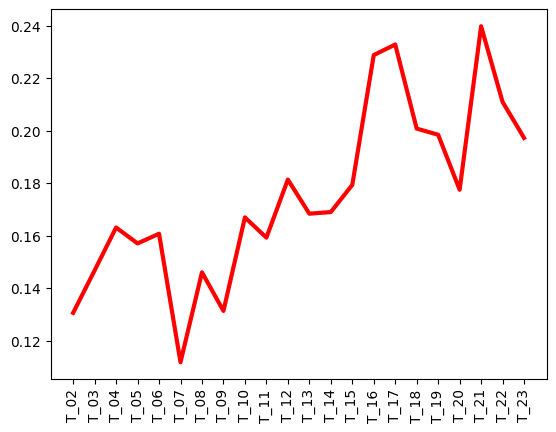

In [9]:
x = list(range(2,24))
y = np.mean(grouped_df)

plt.plot(np.mean(grouped_df), linewidth=3, color= "red")
plt.xticks(rotation=90)
plt.show()

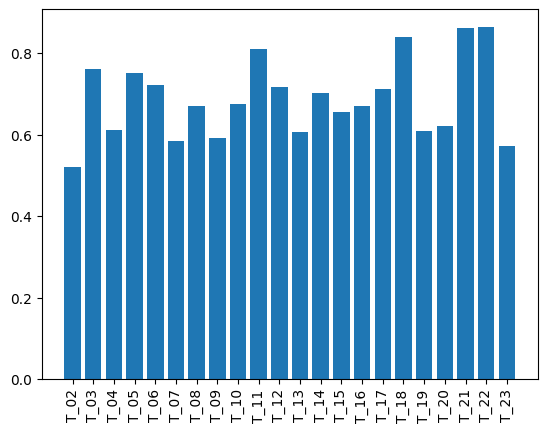

In [10]:
x = list(range(2,24))
y = balloon_count

plt.bar(grouped_df.columns, balloon_count, linewidth=3)
plt.xticks(rotation=90)
plt.show()

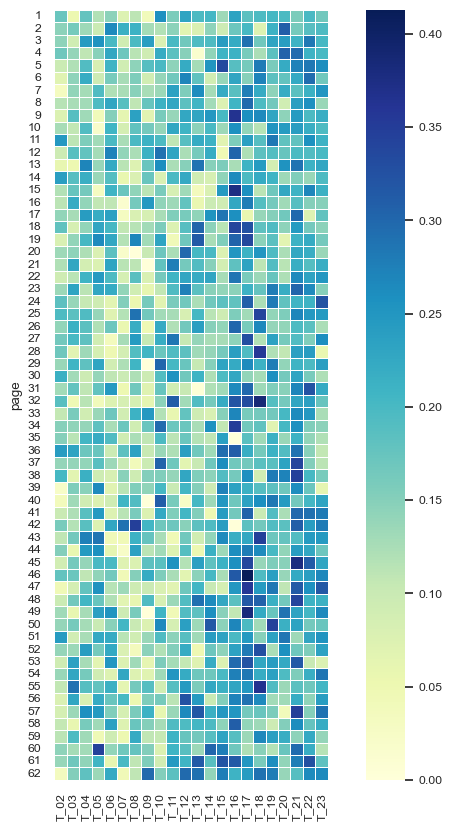

In [11]:
plt.figure(figsize=(10, 10))
sns.set(font_scale = 0.8)
sns_plot = sns.heatmap(grouped_df, annot=False, linewidths = 0.5, annot_kws={"size": 10}, cmap="YlGnBu", square=True)
plt.xticks(rotation=90)
fig = sns_plot.get_figure()

Merge every book csv

In [12]:
folder_path = "./csv_final_versions/"
files = os.listdir(folder_path)
if '.DS_Store' in files:
        files.remove('.DS_Store')
files.sort()

for i, file in enumerate(files):
    if (i+2) < 10:
        file_name = "T_0" + str(i+2)
    else:
        file_name = "T_" + str(i+2)
    path = folder_path + file

    df = pd.read_csv(path)

    if i == 0:
        df_all = df.copy()
    else:
        df_all = pd.concat([df_all, df])

print(len(df_all))

df_all["tintin"] = 0
df_all["snowy"] = 0
df_all["haddock"] = 0
df_all["calculus"] = 0
df_all["t-t"] = 0

df_all.reset_index(inplace=True, drop=True)

for i in range(len(df_all)):
    if "tintin" in df_all["detected_chars"][i]:
        df_all["tintin"][i] = 1 
    if "snowy" in df_all["detected_chars"][i]:
        df_all["snowy"][i] = 1 
    if "haddock" in df_all["detected_chars"][i]:
        df_all["haddock"][i] = 1 
    if "calculus" in df_all["detected_chars"][i]:
        df_all["calculus"][i] = 1 
    if "t-t" in df_all["detected_chars"][i]:
        df_all["t-t"][i] = 1 


df = df_all[['book', 'tintin', 'snowy', 'haddock', 'calculus', 't-t']]

17435


/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_202/4248064032.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["snowy"][i] = 1
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_202/4248064032.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["tintin"][i] = 1
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_202/4248064032.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["t-t

In [35]:
df_all.head()

,book,page,img,balloon_to_panel_ratio,detected_chars,character_model_confidence,balloon_model_confidence,detected_balloon_numbers,associated_balloon_numbers,associated_characters,text,tintin,snowy,haddock,calculus,t-t
0,T_02,1,ROI_16.png,0.260,[],['NONE'],"[0.805, 0.802, 0.53]",3,[],"{0: 'NaN', 1: 'NaN', 2: 'NaN'}","['Farewell, my dear Tintin. Have a good trip a...",0,0,0,0,0
1,T_02,1,ROI_17.png,0.255,['snowy'],[0.729],[0.865],1,['1'],{0: 'snowy'},"[""Yes, I've had enough of the dull life. So, I...",0,1,0,0,0
2,T_02,1,ROI_18.png,0.139,[],['NONE'],"[0.898, 0.867]",2,[],"{0: 'NaN', 1: 'NaN'}","['bye-bye!. Be seeing you!. ', 'wooah! wooah! ']",0,0,0,0,0
3,T_02,1,ROI_19.png,0.000,['tintin'],[0.913],[],0,[],{},[],1,0,0,0,0
4,T_02,1,ROI_20.png,0.158,"['tintin', 'snowy']","[0.946, 0.913]","[0.936, 0.721]",2,[],"{0: 'NaN', 1: 'NaN'}","['excellent. Thank you. ', ""Here's your cabin,...",1,1,0,0,0


## 2. SENTIMENT ANALYSIS

In [36]:
df_all['text_list'] = 0
df_all['associated_characters_list'] = 0

for i in range(len(df_all)):
    df_all['text_list'][i] = ast.literal_eval(df_all['text'][i])
    df_all['associated_characters_list'][i] = ast.literal_eval(df_all['associated_characters'][i])
    for j in range(len(df_all['text_list'][i])):
        df_all['text_list'][i][j] = df_all['text_list'][i][j].replace('.', '').replace(',', '').lower()

/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/1934606650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['text_list'][i] = ast.literal_eval(df_all['text'][i])
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/1934606650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['associated_characters_list'][i] = ast.literal_eval(df_all['associated_characters'][i])


In [37]:
# Existing dictionary
tintin_dict = dict()

# Create a list to hold dictionaries for each page
pages_info = []

# Loop through each page and add information to the list
for i in range(len(df_all)):
    page_dict = tintin_dict.copy()  # Create a copy of the existing dictionary
    for j in range(len(df_all['text_list'][i])):
        page_dict['book'] = df_all['book'][i]
        page_dict['page'] = df_all['page'][i]
        page_dict['panel'] = df_all['img'][i]
        page_dict['chars'] = df_all['detected_chars'][i]
        page_dict['speaker'] = df_all['associated_characters_list'][i][j]
        page_dict['text'] = df_all['text_list'][i][j]
    pages_info.append(page_dict)  # Append the updated dictionary to the list

In [38]:
df_sent = pd.DataFrame(pages_info)[1:].reset_index(drop=True)
df_sent = df_sent[(df_sent['text'].isnull() == False) & (df_sent['text']!= "unknown")].reset_index(drop=True)

In [39]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [40]:
data = ["how?", "you?"]
sentiment_pipeline(data)

[{'label': 'NEGATIVE', 'score': 0.9942571520805359},
 {'label': 'NEGATIVE', 'score': 0.5752028822898865}]

In [41]:
df_sent["sentiment_label"] = None
df_sent["sentiment_score"] = None

for i in tqdm(range(len(df_sent))):
    df_sent["sentiment_label"][i] = sentiment_pipeline(df_sent["text"][i])[0]["label"]
    df_sent["sentiment_score"][i] = sentiment_pipeline(df_sent["text"][i])[0]["score"]

  0%|                                                 | 0/13034 [00:00<?, ?it/s]/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/3809634928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["sentiment_label"][i] = sentiment_pipeline(df_sent["text"][i])[0]["label"]
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/3809634928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["sentiment_score"][i] = sentiment_pipeline(df_sent["text"][i])[0]["score"]
100%|█████████████████████████████████████| 13034/13034 [08:35<00:00, 25.29it/s]


In [42]:
df_sent["sentiment_final"] = 0

for i in range(len(df_sent)):
    if df_sent["sentiment_label"][i] == "NEGATIVE":
        df_sent["sentiment_final"][i] = df_sent["sentiment_score"][i] * (-1)
    else:
        df_sent["sentiment_final"][i] = df_sent["sentiment_score"][i]

/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/3126085367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["sentiment_final"][i] = df_sent["sentiment_score"][i] * (-1)


In [43]:
df_sent["tintin_snowy"] = 0
df_sent["tintin_haddock"] = 0

for i in range(len(df_sent)):
    if(("tintin" in df_sent["chars"][i]) & ("snowy" in df_sent["chars"][i])):
        df_sent["tintin_snowy"][i] = 1
    if(("tintin" in df_sent["chars"][i]) & ("haddock" in df_sent["chars"][i])):
        df_sent["tintin_haddock"][i] = 1

/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/3915265501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["tintin_snowy"][i] = 1
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/3915265501.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["tintin_haddock"][i] = 1


In [44]:
df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])]

,book,page,panel,chars,speaker,text,sentiment_label,sentiment_score,sentiment_final,tintin_snowy,tintin_haddock
0,T_02,1.0,ROI_17.png,['snowy'],snowy,yes i've had enough of the dull life so i've d...,NEGATIVE,0.99541,-0.995410,0,0
1,T_02,1.0,ROI_18.png,[],NaN,wooah! wooah!,NEGATIVE,0.975503,-0.975503,0,0
2,T_02,1.0,ROI_20.png,"['tintin', 'snowy']",NaN,here's your cabin boss,POSITIVE,0.97508,0.975080,1,0
3,T_02,1.0,ROI_21.png,['snowy'],snowy,"yikes a spider! that's bad : "" spider in the m...",NEGATIVE,0.999514,-0.999514,0,0
4,T_02,1.0,ROI_22.png,[],NaN,it's gone in the trunk ' where's the nasty cre...,NEGATIVE,0.999377,-0.999377,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3733,T_08,61.0,ROI_768.png,"['t-t', 't-t']",t-t,!,POSITIVE,0.99937,0.999370,0,0
3734,T_08,61.0,ROI_769.png,"['t-t', 't-t', 'tintin']",NaN,goodness what on earth's happening,POSITIVE,0.999638,0.999638,0,0
3735,T_08,62.0,ROI_772.png,"['t-t', 't-t', 'tintin']",t-t,how absurd had com pletely forgotten,NEGATIVE,0.999674,-0.999674,0,0
3736,T_08,62.0,ROI_774.png,"['t-t', 't-t']",t-t,quite absurd!,NEGATIVE,0.998323,-0.998323,0,0


In [45]:
tintin_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])][df_sent['speaker'] == "tintin"])
snowy_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])][df_sent['speaker'] == "snowy"])
haddock_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])][df_sent['speaker'] == "haddock"])
calculus_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])][df_sent['speaker'] == "calculus"])
t_t_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])][df_sent['speaker'] == "t-t"])

#other_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])])- (tintin_speech + snowy_speech + haddock_speech + calculus_speech + t_t_speech)

/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/843703937.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tintin_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])][df_sent['speaker'] == "tintin"])
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/843703937.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  snowy_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])][df_sent['speaker'] == "snowy"])
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/843703937.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  haddock_speech = len(df_sent[df_sent["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08'])][df_sent['speaker'] == "haddock"])
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_86578/843703937.py:4: UserWarning: Boolea

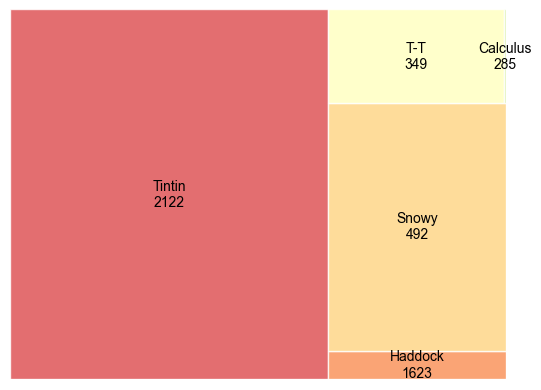

In [46]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd
import seaborn as sb

# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[tintin_speech, haddock_speech, snowy_speech, t_t_speech, calculus_speech],
                   'group':["Tintin\n2122", "Haddock\n1623", "Snowy\n492", "T-T\n349", "Calculus\n285"] })

colors = ["red", "black", "green", "violet", "yellow", "blue"] 

labels = ['Group 1\n 250', 'Group 2\n 120', 'Group 3\n 280',
          'Group 4\n 320', 'Group 5\n 140', 'Group 6\n 95']

# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], text_kwargs = {'fontsize': 10, 'color': 'black'}, alpha=.8, color=sb.color_palette("Spectral", 7))
plt.axis('off')
plt.show()

In [47]:
tintin_speech = len(df_sent[df_sent['speaker'] == "tintin"])
snowy_speech = len(df_sent[df_sent['speaker'] == "snowy"])
haddock_speech = len(df_sent[df_sent['speaker'] == "haddock"])
calculus_speech = len(df_sent[df_sent['speaker'] == "calculus"])
t_t_speech = len(df_sent[df_sent['speaker'] == "t-t"])

#other_speech = len(df_sent)- (tintin_speech + snowy_speech + haddock_speech + calculus_speech + t_t_speech)

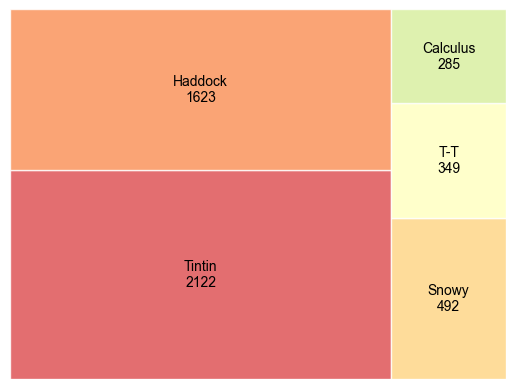

In [48]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd
import seaborn as sb

# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[tintin_speech, haddock_speech, snowy_speech, t_t_speech, calculus_speech],
                   'group':["Tintin\n2122", "Haddock\n1623", "Snowy\n492", "T-T\n349", "Calculus\n285"] })

colors = ["red", "black", "green", "violet", "yellow", "blue"] 

labels = ['Group 1\n 250', 'Group 2\n 120', 'Group 3\n 280',
          'Group 4\n 320', 'Group 5\n 140', 'Group 6\n 95']

# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], text_kwargs = {'fontsize': 10, 'color': 'black'}, alpha=.8, color=sb.color_palette("Spectral", 7))
plt.axis('off')
plt.show()

In [49]:
df_sent.sentiment_final.mean()

-0.1302305130627837

In [50]:
df_sent[df_sent["tintin_snowy"] == 1].sentiment_final.mean()

-0.1264338547924915

In [51]:
df_sent[df_sent["tintin_haddock"] == 1].sentiment_final.mean()

-0.15089614729936948

In [52]:
df_sent[df_sent["speaker"] == "tintin"].sentiment_final.mean()

-0.12676625764111546

In [53]:
df_sent[df_sent["speaker"] == "snowy"].sentiment_final.mean()

-0.18249651171812198

In [54]:
df_sent[df_sent["speaker"] == "haddock"].sentiment_final.mean()

-0.16704057317711435

In [55]:
df_sent[df_sent["speaker"] == "calculus"].sentiment_final.mean()

-0.13847947246149966

In [56]:
df_sent[df_sent["speaker"] == "t-t"].sentiment_final.mean()

-0.1615458924995794

<Axes: xlabel='sentiment_final', ylabel='Density'>

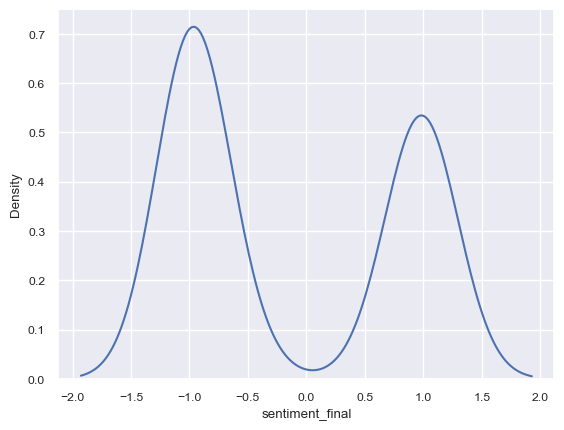

In [57]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Make default density plot
sns.kdeplot(df_sent[df_sent["speaker"] == "calculus"].sentiment_final)

In [70]:
df_sent.page = df_sent.page.astype('int')

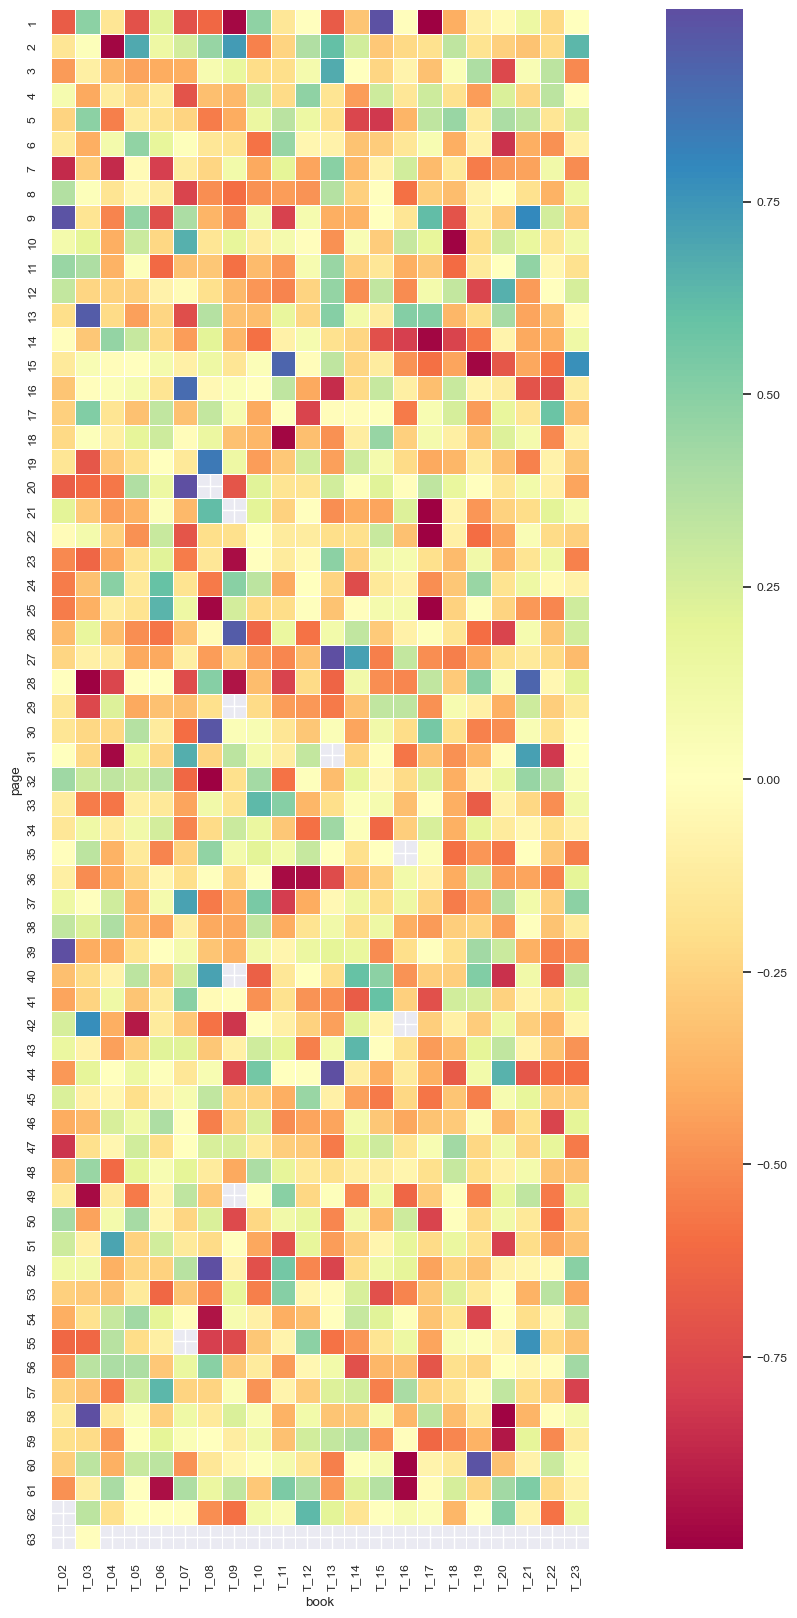

In [77]:
df_sent_grouped = pd.pivot_table(df_sent, values='sentiment_final', index='page',
                       columns=['book'], aggfunc="mean")

plt.figure(figsize=(20, 20))
sns.set(font_scale = 0.8)
sns_plot = sns.heatmap(df_sent_grouped, annot=False, linewidths = 0.5, annot_kws={"size": 10}, cmap="Spectral", square=True)
plt.xticks(rotation=90)
fig = sns_plot.get_figure()

In [78]:
pd.DataFrame(pages_info)

,book,page,panel,chars,speaker,text
0,T_02,1.0,ROI_16.png,[],NaN,farewell my dear tintin have a good trip and t...
1,T_02,1.0,ROI_17.png,['snowy'],snowy,yes i've had enough of the dull life so i've d...
2,T_02,1.0,ROI_18.png,[],NaN,wooah! wooah!
3,NaN,NaN,NaN,NaN,NaN,NaN
4,T_02,1.0,ROI_20.png,"['tintin', 'snowy']",NaN,here's your cabin boss
...,...,...,...,...,...,...
17430,T_23,62.0,ROI_872.png,[],NaN,as for you my_dove i promised you a palace kee...
17431,T_23,62.0,ROI_873.png,[],NaN,fine and dandy anyone can see it isn't who's e...
17432,T_23,62.0,ROI_874.png,[],NaN,binscending barnacles i shann't sorry to be
17433,T_23,62.0,ROI_875.png,[],NaN,me too but with a little if your please mustary


In [79]:
df_sent = pd.DataFrame(pages_info)[1:].reset_index(drop=True)
df_sent = df_sent[(df_sent['chars'].isnull() == False)].reset_index(drop=True)

In [80]:
import ast

pages_df = pd.DataFrame(pages_info)[1:].reset_index(drop=True)
pages_df = pages_df[(pages_df['chars'].isnull() == False)].reset_index(drop=True)

book_infos = []
page_infos = []
panel_infos = []
char_infos = []


for i in range(len(pages_df)):
    for j in range(len(ast.literal_eval(pages_df["chars"][i]))):
        book_infos.append(pages_df["book"][i])
        page_infos.append(pages_df["page"][i])
        panel_infos.append(pages_df["panel"][i])
        char_infos.append(ast.literal_eval(pages_df["chars"][i])[j])
    
char_occurences = pd.DataFrame({'book': book_infos, 'page': page_infos, 'panel': panel_infos, 'char': char_infos})
char_occurences['page'] = char_occurences['page'].astype('int')

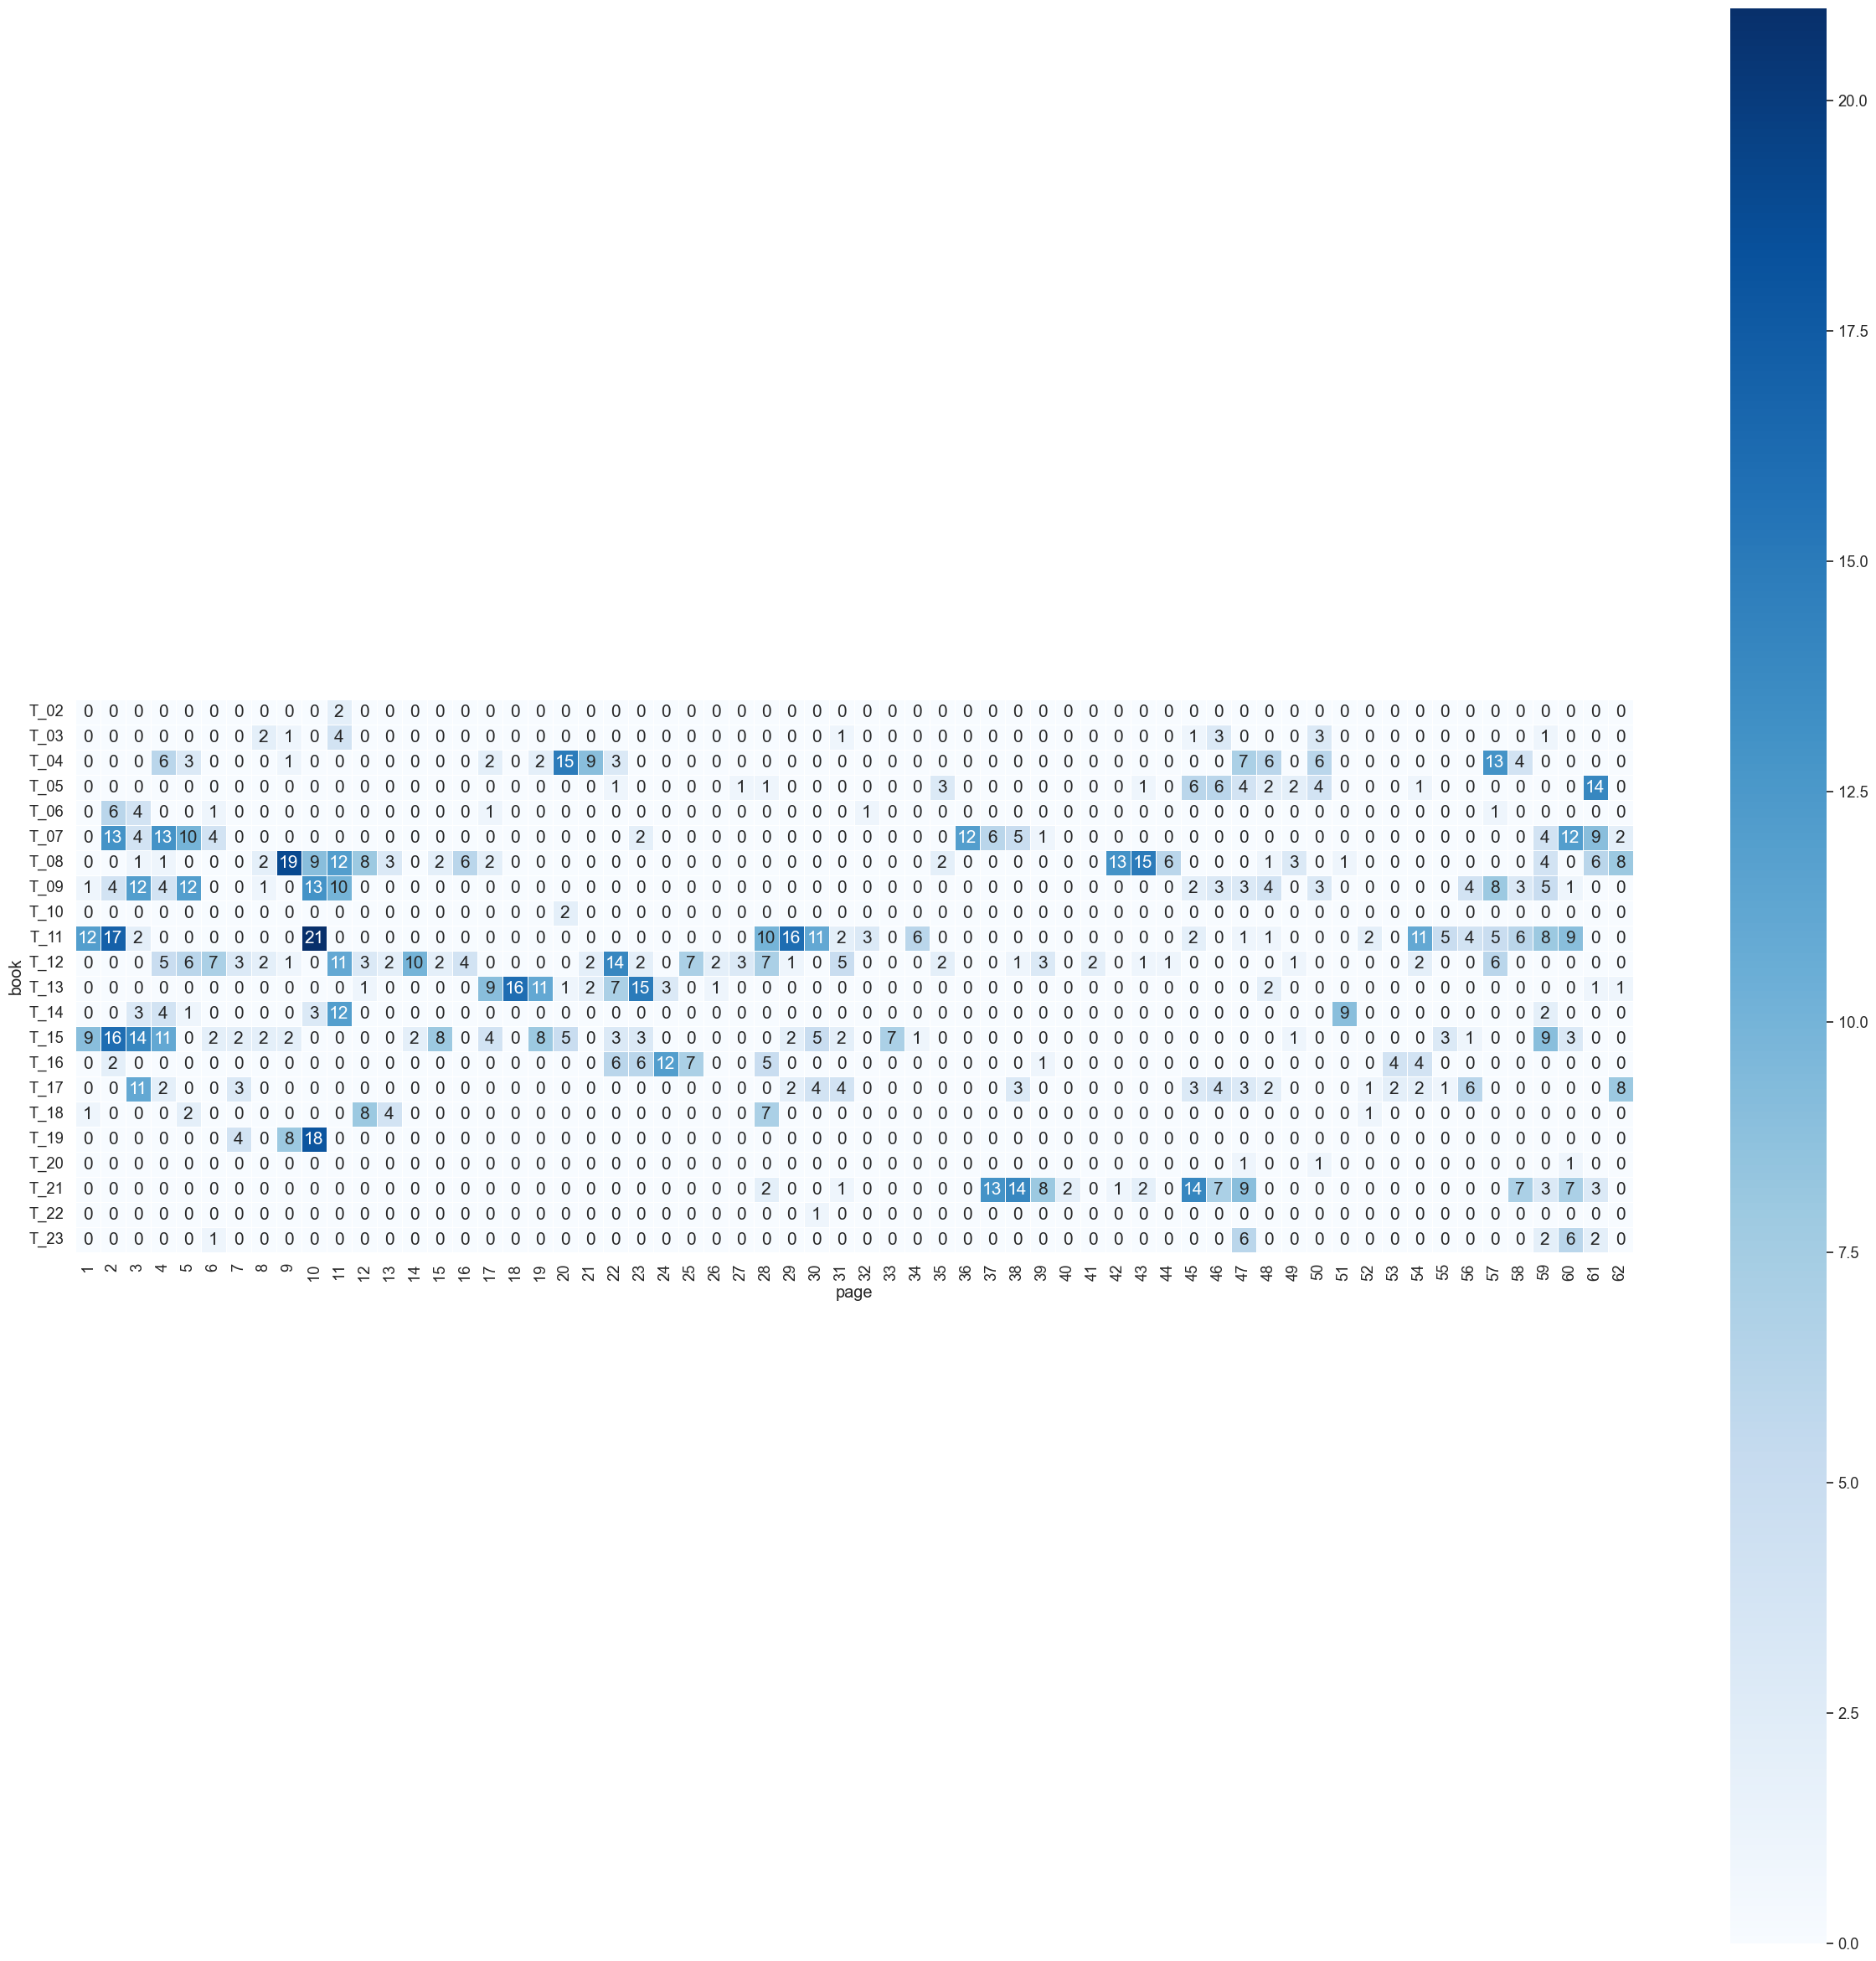

In [86]:
tintin_occ = pd.pivot_table(char_occurences[char_occurences.char == "t-t"], values='char', index='book',
                       columns=['page'], aggfunc="count", fill_value=0)

plt.figure(figsize=(30, 30))
sns.set(font_scale = 1.2)
sns_plot = sns.heatmap(tintin_occ, annot=True, linewidths = 0.5, annot_kws={"size": 15}, cmap="Blues", square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
fig = sns_plot.get_figure()

## 3. WORD FREQUENCIES

In [40]:
import nltk
from nltk.corpus import stopwords

import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/azatsaskal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import string

stop_words = set(stopwords.words('english'))

df_sent["text_clean"] = None

for i in range(len(df_sent)):
    word_tokens = word_tokenize(df_sent["text"][i])
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    df_sent["text_clean"][i] = " ".join(filtered_sentence)
    df_sent["text_clean"][i] = df_sent["text_clean"][i].translate(str.maketrans('', '', string.punctuation))
    
all_words = []
for i in range(len(df_sent)):
    tokens = word_tokenize(df_sent["text_clean"][i])  # Convert text to lowercase for case-insensitive counting
    filtered_tokens = [word for word in tokens if len(word) >= 3]  # Filter out words shorter than 3 characters
    df_sent["text_clean"][i] = " ".join(filtered_tokens)
    df_sent["text_clean"][i] = df_sent["text_clean"][i].translate(str.maketrans('', '', string.punctuation))


/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_53550/2393201898.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["text_clean"][i] = " ".join(filtered_sentence)
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_53550/2393201898.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["text_clean"][i] = df_sent["text_clean"][i].translate(str.maketrans('', '', string.punctuation))
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_53550/2393201898.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [45]:
# Tokenize the text into individual words and create a list of all words
all_words = []
for text in df_sent[df_sent["speaker"] == "tintin"]['text_clean']:
    tokens = word_tokenize(text.lower())  # Convert text to lowercase for case-insensitive counting
    all_words.extend(tokens)

# Count the frequency of each word using Counter
word_freq = Counter(all_words)

# Print the word frequencies
word_freq

Counter({'snowy': 175,
         'captain': 162,
         'look': 113,
         'come': 97,
         'must': 92,
         'unknown': 85,
         'see': 82,
         'well': 82,
         'let': 77,
         'one': 73,
         'good': 70,
         'get': 66,
         'going': 58,
         'hello': 52,
         'professor': 50,
         'yes': 48,
         'right': 47,
         'back': 46,
         'quick': 45,
         'got': 45,
         'great': 45,
         'time': 45,
         'like': 45,
         'know': 42,
         'snakes': 40,
         'calculus': 39,
         'think': 36,
         'poor': 35,
         'say': 34,
         'two': 33,
         'still': 33,
         'someone': 32,
         'take': 31,
         'tell': 31,
         'help': 31,
         'thing': 30,
         'coming': 30,
         'could': 29,
         'something': 29,
         'gone': 29,
         'find': 28,
         'found': 27,
         'tintin': 27,
         'way': 26,
         'little': 26,
         'chang': 2

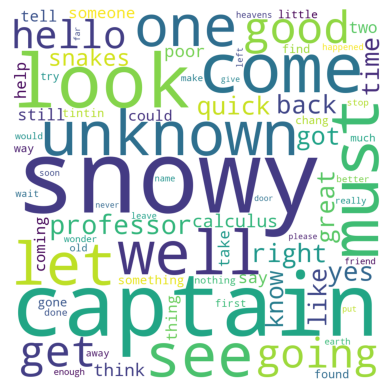

In [46]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="viridis", width=1000,height=1000, max_words=75,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq)
plt.axis('off')
plt.imshow(wc)

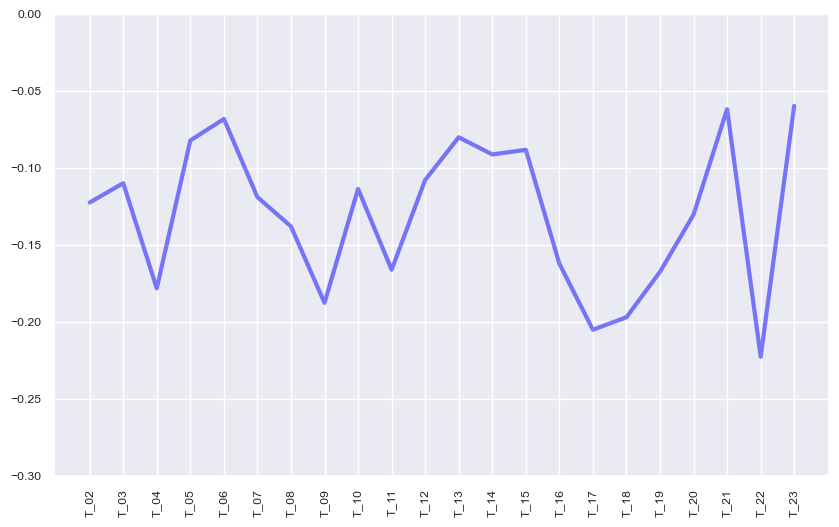

In [106]:
sentiment_avgs = df_sent.groupby('book')['sentiment_final'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.ylim(-0.3, 0)

plt.plot(sentiment_avgs['book'], sentiment_avgs['sentiment_final'], alpha=0.5,  linewidth=3, color="blue")

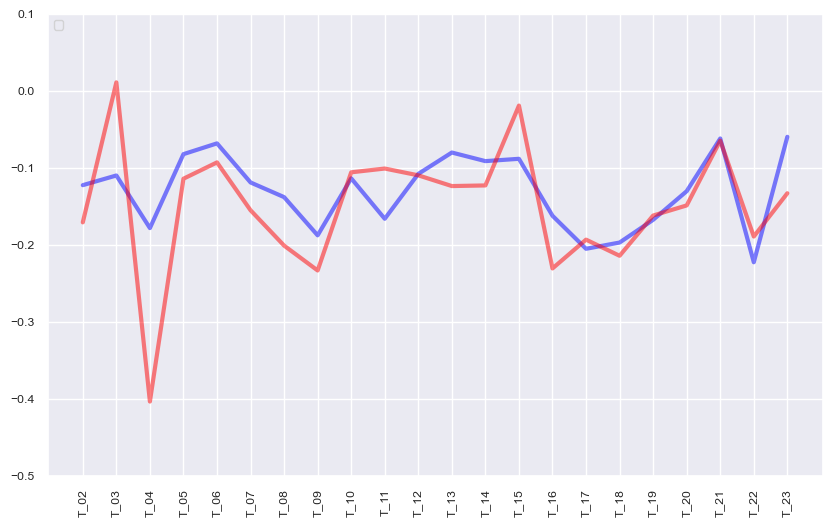

In [35]:
sentiment_avgs_main = df_sent[(df_sent["speaker"] == "tintin") | (df_sent["speaker"] == "snowy") | 
                         (df_sent["speaker"] == "haddock")| (df_sent["speaker"] == "calculus") |
                         (df_sent["speaker"] == "t-t")].groupby('book')['sentiment_final'].mean().reset_index()

sentiment_avgs_nonmain = df_sent[(df_sent["speaker"] != "tintin") | (df_sent["speaker"] != "snowy") | 
                         (df_sent["speaker"] != "haddock")| (df_sent["speaker"] != "calculus") |
                         (df_sent["speaker"] != "t-t")].groupby('book')['sentiment_final'].mean().reset_index()

sentiment_avgs = df_sent.groupby('book')['sentiment_final'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.ylim(-0.5, 0.1)
plt.legend(['First List', 'Second List'], loc='upper left')

plt.plot(sentiment_avgs_nonmain['book'], sentiment_avgs_nonmain['sentiment_final'], alpha=0.5,  linewidth=3, color="blue")
plt.plot(sentiment_avgs_main['book'], sentiment_avgs_main['sentiment_final'], alpha=0.5,  linewidth=3, color="red")

<Axes: xlabel='book'>

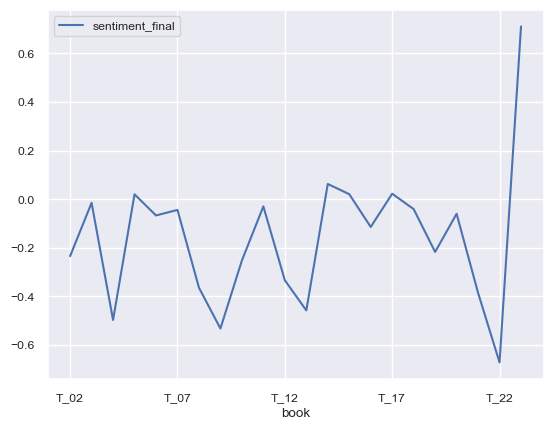

In [71]:
df_sent[df_sent["speaker"] == "snowy"][['book', 'sentiment_final']].groupby('book').mean().plot()

<Axes: xlabel='book'>

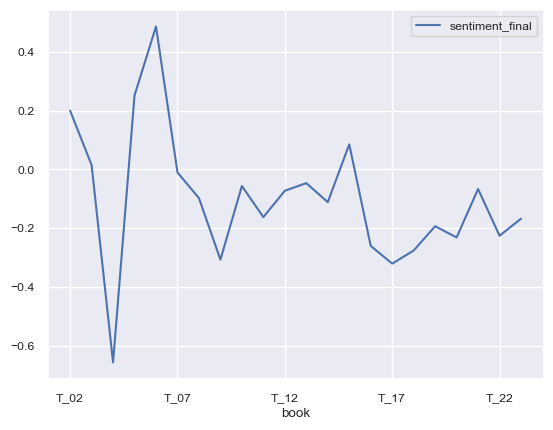

In [72]:
df_sent[df_sent["speaker"] == "haddock"][['book', 'sentiment_final']].groupby('book').mean().plot()

In [73]:
df_sent[df_sent["speaker"] == "tintin"]["sentiment_final"].mean()

-0.12676625764111546

In [74]:
df_sent[df_sent["speaker"] == "haddock"]["sentiment_final"].mean()

-0.16704057317711435

In [75]:
df_sent[df_sent["speaker"] == "snowy"]["sentiment_final"].mean()

-0.18249651171812198

In [76]:
df_sent[df_sent["speaker"] == "t-t"]["sentiment_final"].mean()

-0.1615458924995794

In [77]:
df_sent[df_sent["speaker"] == "calculus"]["sentiment_final"].mean()

-0.13847947246149966

In [79]:
df_sent[df_sent['speaker'] == 'tintin'][['book', 'speaker', 'sentiment_label', 'sentiment_score']].groupby(['book', 'speaker', 'sentiment_label']).count()

sentiment_score
book speaker sentiment_label                 
T_02 tintin  NEGATIVE                      43
             POSITIVE                      32
T_03 tintin  NEGATIVE                      50
             POSITIVE                      56
T_04 tintin  NEGATIVE                      59
             POSITIVE                      32
T_05 tintin  NEGATIVE                      45
             POSITIVE                      26
T_06 tintin  NEGATIVE                      50
             POSITIVE                      36
T_07 tintin  NEGATIVE                      74
             POSITIVE                      57
T_08 tintin  NEGATIVE                      70
             POSITIVE                      50
T_09 tintin  NEGATIVE                      56
             POSITIVE                      36
T_10 tintin  NEGATIVE                      58
             POSITIVE                      48
T_11 tintin  NEGATIVE                      67
             POSITIVE                      58
T_12 tintin  NEGATIVE                      59
             POSITIVE                      37
T_13 tintin  NEGATIVE                      56
             POSITIVE                      42
T_14 tintin  NEGATIVE                      89
             POSITIVE                      66
T_15 tintin  NEGATIVE                      37
             POSITIVE                      35
T_16 tintin  NEGATIVE                      38
             POSITIVE                      25
T_17 tintin  NEGATIVE                      44
             POSITIVE                      41
T_18 tintin  NEGATIVE                      67
             POSITIVE                      48
T_19 tintin  NEGATIVE                      47
             POSITIVE                      39
T_20 tintin  NEGATIVE                      42
             POSITIVE                      38
T_21 tintin  NEGATIVE                      51
             POSITIVE                      45
T_22 tintin  NEGATIVE                      50
             POSITIVE                      38
T_23 tintin  NEGATIVE                      51
             POSITIVE                      34

In [80]:
df_sent.sentiment_label.value_counts(normalize=True)

NEGATIVE    0.567439
POSITIVE    0.432561
Name: sentiment_label, dtype: float64

In [81]:
df_sent[df_sent["speaker"] == "haddock"]['sentiment_label'].value_counts(normalize=True)

NEGATIVE    0.586568
POSITIVE    0.413432
Name: sentiment_label, dtype: float64

In [82]:
df_sent[df_sent["speaker"] == "tintin"]['sentiment_label'].value_counts(normalize=True)

NEGATIVE    0.566918
POSITIVE    0.433082
Name: sentiment_label, dtype: float64

In [83]:
df_sent[df_sent["speaker"] == "snowy"]['sentiment_label'].value_counts(normalize=True)

NEGATIVE    0.593496
POSITIVE    0.406504
Name: sentiment_label, dtype: float64

In [84]:
df_sent[df_sent["speaker"] == "calculus"]['sentiment_label'].value_counts(normalize=True)

NEGATIVE    0.578947
POSITIVE    0.421053
Name: sentiment_label, dtype: float64

In [85]:
df_sent[df_sent["speaker"] == "t-t"]['sentiment_label'].value_counts(normalize=True)

NEGATIVE    0.581662
POSITIVE    0.418338
Name: sentiment_label, dtype: float64

## 4. CO-OCCURENCE NETWORKS

In [231]:
df_until10 = df[df["book"].isin(['T_02', 'T_03', 'T_04', 'T_05', 'T_06', 'T_07', 'T_08', 'T_09', 'T_10'])]

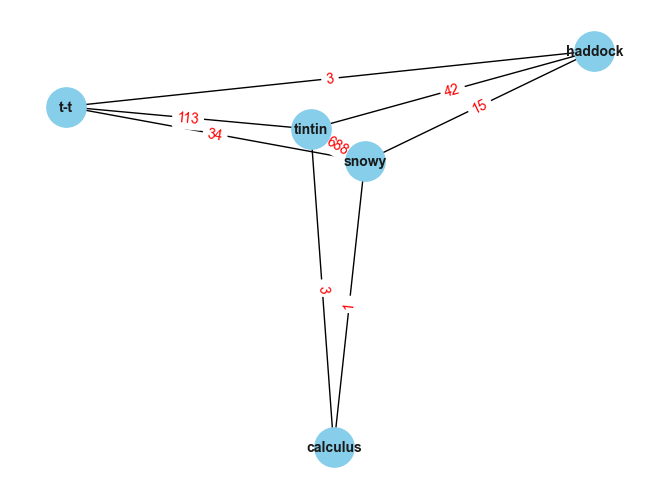

In [254]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_net = df_until10.drop(columns="book")

# Create an empty graph
G = nx.Graph()

# Add nodes (characters) to the graph
G.add_nodes_from(df_net.columns)

# Iterate through each pair of characters and count co-occurrences
for i, char1 in enumerate(df_until9.columns):
    for j, char2 in enumerate(df_until9.columns):
        if i < j:
            co_occurrences = sum((df_until9[char1] == 1) & (df_until9[char2] == 1))
            if co_occurrences > 0:
                G.add_edge(char1, char2, weight=co_occurrences)

# Draw the graph
pos = nx.spring_layout(G, seed = 55)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=800, edge_color = "black", node_color='skyblue', font_size=10, font_weight='bold')

# Add edge labels (co-occurrence counts)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

#plt.title('Comic Character Co-occurrence Network')
plt.show()

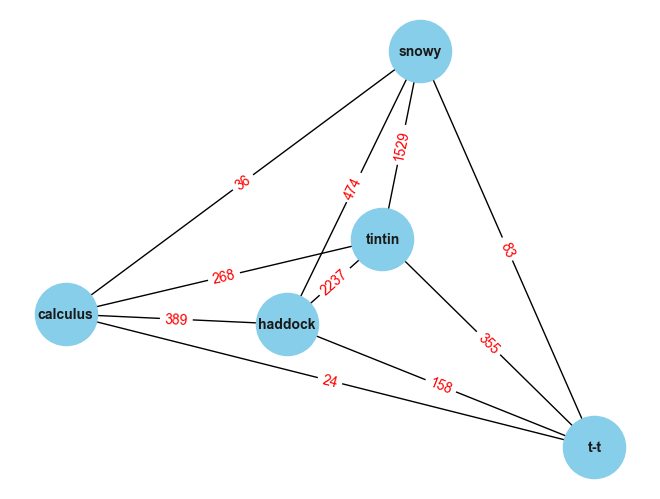

In [86]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_net = df.drop(columns="book")

# Create an empty graph
G = nx.Graph()

# Add nodes (characters) to the graph
G.add_nodes_from(df_net.columns)

# Iterate through each pair of characters and count co-occurrences
for i, char1 in enumerate(df.columns):
    for j, char2 in enumerate(df.columns):
        if i < j:
            co_occurrences = sum((df[char1] == 1) & (df[char2] == 1))
            if co_occurrences > 0:
                G.add_edge(char1, char2, weight=co_occurrences)

# Draw the graph
pos = nx.spring_layout(G, seed = 45)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=2000, edge_color = "black", node_color='skyblue', font_size=10, font_weight='bold')

# Add edge labels (co-occurrence counts)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

#plt.title('Comic Character Co-occurrence Network')
plt.show()

In [112]:
df[(df["tintin"] == 1) & (df["snowy"] == 1)].count()[0]

1529

In [113]:
df[(df["tintin"] == 1) & (df["haddock"] == 1)].count()[0]

2237

In [114]:
df[(df["tintin"] == 1) & (df["haddock"] == 1) & (df["snowy"] == 1)].count()[0]

348

In [101]:
tintin_snowy = df[(df["tintin"] == 1) & (df["snowy"] == 1)].groupby("book").count()["tintin"]
tintin_haddock = df[(df["tintin"] == 1) & (df["haddock"] == 1)].groupby("book").count()["tintin"]

In [139]:
total = 0
tintin_snowy_cumulative = []
for obs in tintin_snowy:
    total += obs
    tintin_snowy_cumulative.append(total)
    
total = 0
tintin_haddock_cumulative = []
for obs in tintin_haddock:
    total += obs
    tintin_haddock_cumulative.append(total)
    

In [134]:
tintin_haddock

book
T_02     10
T_03      3
T_04     17
T_05      5
T_06      3
T_07      4
T_09     72
T_10     86
T_11    147
T_12    262
T_13    159
T_14    172
T_15     29
T_16    132
T_17     96
T_18    264
T_19    212
T_20    149
T_21    133
T_22    153
T_23    129
Name: tintin, dtype: int64

In [141]:
tintin_haddock_cumulative.insert(6, 42)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'T_02'),
  Text(1, 0, 'T_03'),
  Text(2, 0, 'T_04'),
  Text(3, 0, 'T_05'),
  Text(4, 0, 'T_06'),
  Text(5, 0, 'T_07'),
  Text(6, 0, 'T_08'),
  Text(7, 0, 'T_09'),
  Text(8, 0, 'T_10'),
  Text(9, 0, 'T_11'),
  Text(10, 0, 'T_12'),
  Text(11, 0, 'T_13'),
  Text(12, 0, 'T_14'),
  Text(13, 0, 'T_15'),
  Text(14, 0, 'T_16'),
  Text(15, 0, 'T_17'),
  Text(16, 0, 'T_18'),
  Text(17, 0, 'T_19'),
  Text(18, 0, 'T_20'),
  Text(19, 0, 'T_21'),
  Text(20, 0, 'T_22'),
  Text(21, 0, 'T_23')])

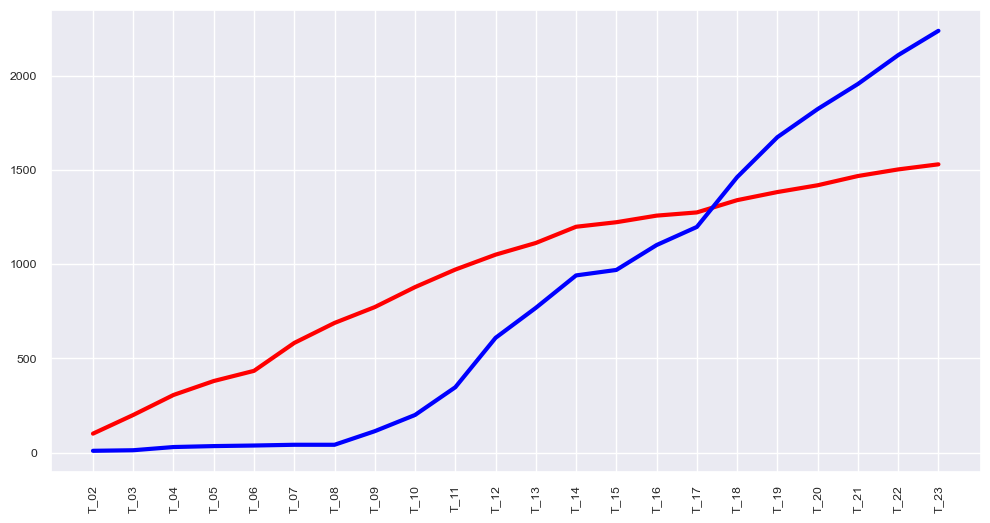

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df.columns,tintin_snowy_cumulative, color="red", linewidth=3)
plt.plot(grouped_df.columns, tintin_haddock_cumulative, color="blue", linewidth=3)
plt.xticks(rotation=90)

## 5. VENN DIAGRAM

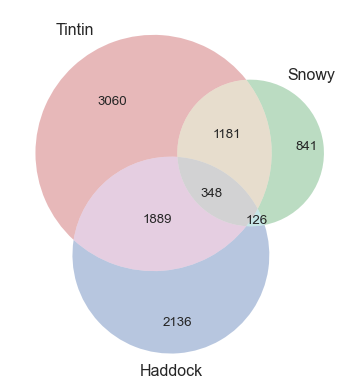

In [255]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Calculate the co-occurrence counts
co_occurrence_counts = {
    'tintin_only': sum((df['tintin'] == 1) & ~(df['snowy'] == 1) & ~(df['haddock'] == 1)),
    'snowy_only': sum((df['snowy'] == 1) & ~(df['tintin'] == 1) & ~(df['haddock'] == 1) ),
    'haddock_only': sum((df['haddock'] == 1) & ~(df['tintin'] == 1) & ~(df['snowy'] == 1) ),
    'both_tintin_snowy': sum((df['tintin'] == 1) & (df['snowy'] == 1) & ~(df['haddock'] == 1) ),
    'both_tintin_haddock': sum((df['tintin'] == 1) & (df['haddock'] == 1) & ~(df['snowy'] == 1) ),
    'both_snowy_haddock': sum((df['snowy'] == 1) & (df['haddock'] == 1) & ~(df['tintin'] == 1) ),
    'all_three': sum((df['tintin'] == 1) & (df['snowy'] == 1) & (df['haddock'] == 1) ),
    'neither': len(df) - sum(df['tintin'] == 1) - sum(df['snowy'] == 1) - sum(df['haddock'] == 1)
}

# Create a Venn diagram
venn3(subsets=(co_occurrence_counts['tintin_only'], co_occurrence_counts['snowy_only'], co_occurrence_counts['both_tintin_snowy'],
               co_occurrence_counts['haddock_only'], co_occurrence_counts['both_tintin_haddock'], co_occurrence_counts['both_snowy_haddock'],
               co_occurrence_counts['all_three']), 
      set_labels=('Tintin', 'Snowy', 'Haddock'))

#plt.title('Co-occurrence of Tintin, Snowy, and Haddock')
plt.show()


## 6. TOTAL INDIVIDUAL OCCURENCES

In [14]:
total = 0
tintin_occ = []
for obs in df.groupby('book')['tintin'].sum():
    total += obs
    tintin_occ.append(total)

total = 0
haddock_occ = []
for obs in df.groupby('book')['haddock'].sum():
    total += obs
    haddock_occ.append(total)
    
total = 0
snowy_occ = []
for obs in df.groupby('book')['snowy'].sum():
    total += obs
    snowy_occ.append(total)
    
total = 0
calculus_occ = []
for obs in df.groupby('book')['calculus'].sum():
    total += obs
    calculus_occ.append(total)
    
total = 0
tt_occ = []
for obs in df.groupby('book')['t-t'].sum():
    total += obs
    tt_occ.append(total)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'T_02'),
  Text(1, 0, 'T_03'),
  Text(2, 0, 'T_04'),
  Text(3, 0, 'T_05'),
  Text(4, 0, 'T_06'),
  Text(5, 0, 'T_07'),
  Text(6, 0, 'T_08'),
  Text(7, 0, 'T_09'),
  Text(8, 0, 'T_10'),
  Text(9, 0, 'T_11'),
  Text(10, 0, 'T_12'),
  Text(11, 0, 'T_13'),
  Text(12, 0, 'T_14'),
  Text(13, 0, 'T_15'),
  Text(14, 0, 'T_16'),
  Text(15, 0, 'T_17'),
  Text(16, 0, 'T_18'),
  Text(17, 0, 'T_19'),
  Text(18, 0, 'T_20'),
  Text(19, 0, 'T_21'),
  Text(20, 0, 'T_22'),
  Text(21, 0, 'T_23')])

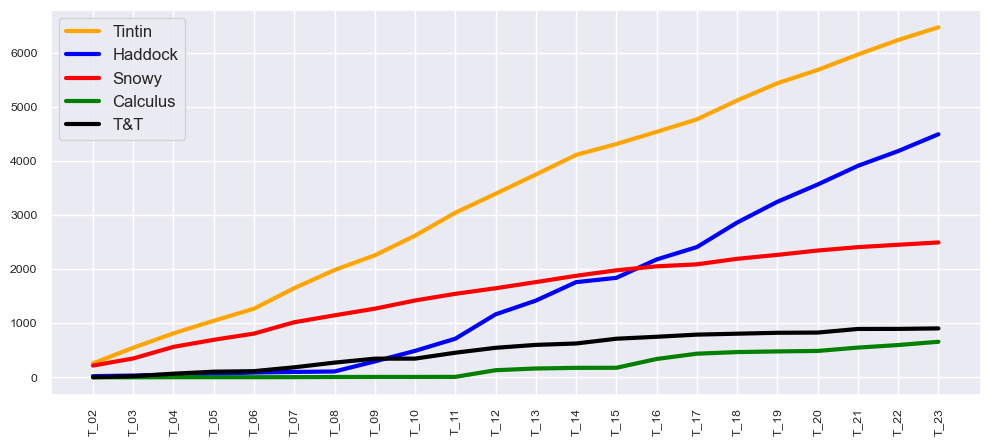

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(grouped_df.columns, tintin_occ, color="orange", linewidth=3, label = "Tintin")
plt.plot(grouped_df.columns, haddock_occ, color="blue", linewidth=3, label = "Haddock")
plt.plot(grouped_df.columns, snowy_occ, color="red", linewidth=3, label = "Snowy")
plt.plot(grouped_df.columns, calculus_occ, color="green", linewidth=3, label = "Calculus")
plt.plot(grouped_df.columns, tt_occ, color="black", linewidth=3, label = "T&T")
plt.legend(loc="upper left", prop={'size': 12})
plt.xticks(rotation=90)

In [209]:
df.groupby('book')['haddock'].sum()

book
T_02     22
T_03     10
T_04     18
T_05     16
T_06     22
T_07     11
T_08      9
T_09    186
T_10    195
T_11    225
T_12    451
T_13    254
T_14    342
T_15     80
T_16    340
T_17    229
T_18    454
T_19    385
T_20    319
T_21    346
T_22    273
T_23    312
Name: haddock, dtype: int64